# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Parsing Energy Consumption Data - WIND

In [2]:
data_energia = pd.read_excel('energia eolica 2017.xlsx', header=0)
data_energia['% EOL.'] =data_energia['Eólica']/data_energia['Generación neta\xa02017'] * 100
data_energia['DIFF'] = data_energia['Demanda B.C 2017'] - data_energia['Generación neta\xa02017']

# Assigning each Province to a Comunidades
- To assign a consumption value to each municipaity (distribution of consumption for community)

In [3]:
#data_muni = pd.read_csv("BD_Municipios_Entidades/MUNICIPIOS.csv", sep=';', decimal=',',encoding='latin-1')
data_muni = pd.read_excel('data_muni.xls').drop(['Unnamed: 0'], axis=1)

for k in range(len(data_muni)):
    print(k)
    i = data_muni.loc[k]['PROVINCIA']
    print(i)
    
    if i in ['Araba/alava', 'Gipuzkoa', 'Bizkaia']:
        data_muni.loc[k, 'COMUNIDAD'] = 'País Vasco'

    elif i in ['Albacete', 'Ciudad Real','Guadalajara', 'Toledo', 'Cuenca' ]:
        data_muni.loc[k,'COMUNIDAD'] = 'Castilla la Mancha'

    elif i in ['Barcelona', 'Tarragona', 'Lleida', 'Girona']:
        data_muni.loc[k,'COMUNIDAD']='Cataluña'

    elif i in ['Zaragoza', 'Huesca', 'Teruel']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Aragón'

    elif i in ['Alicante','Castellon', 'Valencia' ]:
        data_muni.loc[k, 'COMUNIDAD'] = 'Comunidad Valenciana'

    elif i in ['Malaga', 'Almeria', 'Sevilla', 'Cadiz', 'Cordoba', 'Jaen','Granada', 'Huelva']:
        data_muni.loc[k,'COMUNIDAD'] = 'Andalucía'

    elif i in ['Caceres', 'Badajoz']:
        data_muni.loc[k,'COMUNIDAD'] = 'Extremadura'

    elif i in ['Avila', 'Burgos', 'Leon', 'Palencia', 'Zamora', 'Segovia', 'Soria', 'Salamanca', 'Valladolid']:
        data_muni.loc[k,'COMUNIDAD'] = 'Castilla y León'

    elif i in ['Madrid']:
        data_muni.loc[k,'COMUNIDAD'] = 'Madrid'

    elif i in ['Cantabria']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Cantabria'
        
    elif i in ['Ceuta']:
        data_muni.loc[k,'COMUNIDAD'] = 'Ceuta'
    
    elif i in ['Melilla']:
        data_muni.loc[k,'COMUNIDAD'] = 'Melilla'

    elif i in ['La Rioja']:
        data_muni.loc[k,'COMUNIDAD'] = 'La Rioja'

    elif i in ['Murcia']:
        data_muni.loc[k,'COMUNIDAD'] = 'Murcia'

    elif i in ['A Coruña','Lugo', 'Pontevedra', 'Ourense']:
        data_muni.loc[k,'COMUNIDAD'] = 'Galicia'

    elif i in ['Navarra']:
        data_muni.loc[k,'COMUNIDAD'] = 'Navarra'

    elif i in ['Las Palmas', 'Tenerife']:
        data_muni.loc[k,'COMUNIDAD'] = 'Canarias'

    elif i in ['Asturias']:
        data_muni.loc[k, 'COMUNIDAD'] = 'Asturias'

    elif i in ['Baleares']:
        data_muni.loc[k,'COMUNIDAD'] = 'Baleares'

0
Araba/alava
1
Araba/alava
2
Araba/alava
3
Araba/alava
4
Araba/alava
5
Araba/alava
6
Araba/alava
7
Araba/alava
8
Araba/alava
9
Araba/alava
10
Araba/alava
11
Araba/alava
12
Araba/alava
13
Araba/alava
14
Araba/alava
15
Araba/alava
16
Araba/alava
17
Araba/alava
18
Araba/alava
19
Araba/alava
20
Araba/alava
21
Araba/alava
22
Araba/alava
23
Araba/alava
24
Araba/alava
25
Araba/alava
26
Araba/alava
27
Araba/alava
28
Araba/alava
29
Araba/alava
30
Araba/alava
31
Araba/alava
32
Araba/alava
33
Araba/alava
34
Araba/alava
35
Araba/alava
36
Araba/alava
37
Araba/alava
38
Araba/alava
39
Araba/alava
40
Araba/alava
41
Araba/alava
42
Araba/alava
43
Araba/alava
44
Araba/alava
45
Araba/alava
46
Araba/alava
47
Araba/alava
48
Araba/alava
49
Araba/alava
50
Araba/alava
51
Albacete
52
Albacete
53
Albacete
54
Albacete
55
Albacete
56
Albacete
57
Albacete
58
Albacete
59
Albacete
60
Albacete
61
Albacete
62
Albacete
63
Albacete
64
Albacete
65
Albacete
66
Albacete
67
Albacete
68
Albacete
69
Albacete
70
Albacete
71
Al

703
Badajoz
704
Badajoz
705
Badajoz
706
Badajoz
707
Badajoz
708
Badajoz
709
Badajoz
710
Badajoz
711
Badajoz
712
Badajoz
713
Badajoz
714
Badajoz
715
Badajoz
716
Badajoz
717
Badajoz
718
Badajoz
719
Badajoz
720
Badajoz
721
Badajoz
722
Badajoz
723
Badajoz
724
Badajoz
725
Badajoz
726
Badajoz
727
Badajoz
728
Badajoz
729
Badajoz
730
Badajoz
731
Badajoz
732
Badajoz
733
Badajoz
734
Badajoz
735
Badajoz
736
Badajoz
737
Badajoz
738
Badajoz
739
Badajoz
740
Badajoz
741
Badajoz
742
Badajoz
743
Badajoz
744
Badajoz
745
Badajoz
746
Badajoz
747
Badajoz
748
Badajoz
749
Badajoz
750
Badajoz
751
Badajoz
752
Badajoz
753
Badajoz
754
Badajoz
755
Badajoz
756
Badajoz
757
Badajoz
758
Badajoz
759
Badajoz
760
Badajoz
761
Badajoz
762
Badajoz
763
Badajoz
764
Badajoz
765
Badajoz
766
Badajoz
767
Badajoz
768
Badajoz
769
Badajoz
770
Badajoz
771
Badajoz
772
Badajoz
773
Badajoz
774
Badajoz
775
Badajoz
776
Badajoz
777
Badajoz
778
Badajoz
779
Badajoz
780
Badajoz
781
Badajoz
782
Badajoz
783
Badajoz
784
Badajoz
785
Badajoz
786


1334
Burgos
1335
Burgos
1336
Burgos
1337
Burgos
1338
Burgos
1339
Burgos
1340
Burgos
1341
Burgos
1342
Burgos
1343
Burgos
1344
Burgos
1345
Burgos
1346
Burgos
1347
Burgos
1348
Burgos
1349
Burgos
1350
Burgos
1351
Burgos
1352
Burgos
1353
Burgos
1354
Burgos
1355
Burgos
1356
Burgos
1357
Burgos
1358
Burgos
1359
Burgos
1360
Burgos
1361
Burgos
1362
Burgos
1363
Burgos
1364
Burgos
1365
Burgos
1366
Burgos
1367
Burgos
1368
Burgos
1369
Burgos
1370
Burgos
1371
Burgos
1372
Burgos
1373
Burgos
1374
Burgos
1375
Burgos
1376
Burgos
1377
Burgos
1378
Burgos
1379
Burgos
1380
Burgos
1381
Burgos
1382
Burgos
1383
Burgos
1384
Burgos
1385
Burgos
1386
Burgos
1387
Burgos
1388
Burgos
1389
Burgos
1390
Burgos
1391
Burgos
1392
Burgos
1393
Burgos
1394
Burgos
1395
Burgos
1396
Burgos
1397
Burgos
1398
Burgos
1399
Burgos
1400
Burgos
1401
Burgos
1402
Burgos
1403
Burgos
1404
Burgos
1405
Burgos
1406
Burgos
1407
Burgos
1408
Burgos
1409
Burgos
1410
Burgos
1411
Burgos
1412
Burgos
1413
Burgos
1414
Burgos
1415
Burgos
1416
Burgos
1417

1962
Ciudad Real
1963
Ciudad Real
1964
Ciudad Real
1965
Ciudad Real
1966
Ciudad Real
1967
Ciudad Real
1968
Ciudad Real
1969
Ciudad Real
1970
Ciudad Real
1971
Ciudad Real
1972
Ciudad Real
1973
Ciudad Real
1974
Ciudad Real
1975
Ciudad Real
1976
Ciudad Real
1977
Ciudad Real
1978
Ciudad Real
1979
Ciudad Real
1980
Ciudad Real
1981
Ciudad Real
1982
Ciudad Real
1983
Ciudad Real
1984
Ciudad Real
1985
Ciudad Real
1986
Ciudad Real
1987
Ciudad Real
1988
Ciudad Real
1989
Ciudad Real
1990
Ciudad Real
1991
Ciudad Real
1992
Ciudad Real
1993
Ciudad Real
1994
Ciudad Real
1995
Ciudad Real
1996
Ciudad Real
1997
Ciudad Real
1998
Ciudad Real
1999
Ciudad Real
2000
Ciudad Real
2001
Ciudad Real
2002
Ciudad Real
2003
Ciudad Real
2004
Ciudad Real
2005
Ciudad Real
2006
Ciudad Real
2007
Ciudad Real
2008
Ciudad Real
2009
Ciudad Real
2010
Ciudad Real
2011
Ciudad Real
2012
Ciudad Real
2013
Ciudad Real
2014
Ciudad Real
2015
Ciudad Real
2016
Ciudad Real
2017
Ciudad Real
2018
Ciudad Real
2019
Ciudad Real
2020
Ciudad Re

2594
Girona
2595
Girona
2596
Girona
2597
Girona
2598
Girona
2599
Girona
2600
Girona
2601
Girona
2602
Girona
2603
Girona
2604
Girona
2605
Girona
2606
Girona
2607
Girona
2608
Girona
2609
Girona
2610
Girona
2611
Girona
2612
Girona
2613
Girona
2614
Girona
2615
Girona
2616
Girona
2617
Girona
2618
Girona
2619
Girona
2620
Girona
2621
Girona
2622
Girona
2623
Girona
2624
Girona
2625
Girona
2626
Girona
2627
Girona
2628
Girona
2629
Girona
2630
Girona
2631
Girona
2632
Girona
2633
Girona
2634
Girona
2635
Girona
2636
Girona
2637
Girona
2638
Girona
2639
Girona
2640
Girona
2641
Girona
2642
Girona
2643
Girona
2644
Girona
2645
Girona
2646
Girona
2647
Girona
2648
Girona
2649
Girona
2650
Girona
2651
Girona
2652
Girona
2653
Girona
2654
Girona
2655
Girona
2656
Girona
2657
Girona
2658
Girona
2659
Girona
2660
Girona
2661
Girona
2662
Girona
2663
Girona
2664
Girona
2665
Girona
2666
Girona
2667
Girona
2668
Girona
2669
Girona
2670
Girona
2671
Girona
2672
Girona
2673
Girona
2674
Girona
2675
Girona
2676
Girona
2677

Gipuzkoa
3171
Gipuzkoa
3172
Gipuzkoa
3173
Gipuzkoa
3174
Gipuzkoa
3175
Gipuzkoa
3176
Gipuzkoa
3177
Gipuzkoa
3178
Gipuzkoa
3179
Gipuzkoa
3180
Gipuzkoa
3181
Gipuzkoa
3182
Gipuzkoa
3183
Gipuzkoa
3184
Gipuzkoa
3185
Gipuzkoa
3186
Gipuzkoa
3187
Gipuzkoa
3188
Gipuzkoa
3189
Gipuzkoa
3190
Gipuzkoa
3191
Gipuzkoa
3192
Gipuzkoa
3193
Gipuzkoa
3194
Gipuzkoa
3195
Gipuzkoa
3196
Gipuzkoa
3197
Gipuzkoa
3198
Gipuzkoa
3199
Gipuzkoa
3200
Gipuzkoa
3201
Gipuzkoa
3202
Gipuzkoa
3203
Gipuzkoa
3204
Gipuzkoa
3205
Gipuzkoa
3206
Gipuzkoa
3207
Gipuzkoa
3208
Gipuzkoa
3209
Gipuzkoa
3210
Gipuzkoa
3211
Gipuzkoa
3212
Gipuzkoa
3213
Gipuzkoa
3214
Gipuzkoa
3215
Gipuzkoa
3216
Gipuzkoa
3217
Gipuzkoa
3218
Gipuzkoa
3219
Gipuzkoa
3220
Gipuzkoa
3221
Gipuzkoa
3222
Gipuzkoa
3223
Gipuzkoa
3224
Gipuzkoa
3225
Gipuzkoa
3226
Gipuzkoa
3227
Gipuzkoa
3228
Huelva
3229
Huelva
3230
Huelva
3231
Huelva
3232
Huelva
3233
Huelva
3234
Huelva
3235
Huelva
3236
Huelva
3237
Huelva
3238
Huelva
3239
Huelva
3240
Huelva
3241
Huelva
3242
Huelva
3243
Huelva
3

3917
Lleida
3918
Lleida
3919
Lleida
3920
Lleida
3921
Lleida
3922
Lleida
3923
Lleida
3924
Lleida
3925
Lleida
3926
Lleida
3927
Lleida
3928
Lleida
3929
Lleida
3930
Lleida
3931
Lleida
3932
Lleida
3933
Lleida
3934
Lleida
3935
Lleida
3936
Lleida
3937
Lleida
3938
Lleida
3939
Lleida
3940
Lleida
3941
Lleida
3942
Lleida
3943
Lleida
3944
Lleida
3945
Lleida
3946
Lleida
3947
Lleida
3948
Lleida
3949
Lleida
3950
Lleida
3951
Lleida
3952
Lleida
3953
Lleida
3954
Lleida
3955
Lleida
3956
Lleida
3957
Lleida
3958
Lleida
3959
Lleida
3960
Lleida
3961
Lleida
3962
Lleida
3963
Lleida
3964
Lleida
3965
Lleida
3966
Lleida
3967
Lleida
3968
Lleida
3969
Lleida
3970
Lleida
3971
Lleida
3972
Lleida
3973
Lleida
3974
Lleida
3975
Lleida
3976
Lleida
3977
Lleida
3978
Lleida
3979
Lleida
3980
Lleida
3981
Lleida
3982
Lleida
3983
Lleida
3984
Lleida
3985
Lleida
3986
Lleida
3987
Lleida
3988
Lleida
3989
Lleida
3990
Lleida
3991
Lleida
3992
Lleida
3993
Lleida
3994
Lleida
3995
Lleida
3996
Lleida
3997
Lleida
3998
Lleida
3999
Lleida
4000

4612
Murcia
4613
Murcia
4614
Murcia
4615
Murcia
4616
Murcia
4617
Navarra
4618
Navarra
4619
Navarra
4620
Navarra
4621
Navarra
4622
Navarra
4623
Navarra
4624
Navarra
4625
Navarra
4626
Navarra
4627
Navarra
4628
Navarra
4629
Navarra
4630
Navarra
4631
Navarra
4632
Navarra
4633
Navarra
4634
Navarra
4635
Navarra
4636
Navarra
4637
Navarra
4638
Navarra
4639
Navarra
4640
Navarra
4641
Navarra
4642
Navarra
4643
Navarra
4644
Navarra
4645
Navarra
4646
Navarra
4647
Navarra
4648
Navarra
4649
Navarra
4650
Navarra
4651
Navarra
4652
Navarra
4653
Navarra
4654
Navarra
4655
Navarra
4656
Navarra
4657
Navarra
4658
Navarra
4659
Navarra
4660
Navarra
4661
Navarra
4662
Navarra
4663
Navarra
4664
Navarra
4665
Navarra
4666
Navarra
4667
Navarra
4668
Navarra
4669
Navarra
4670
Navarra
4671
Navarra
4672
Navarra
4673
Navarra
4674
Navarra
4675
Navarra
4676
Navarra
4677
Navarra
4678
Navarra
4679
Navarra
4680
Navarra
4681
Navarra
4682
Navarra
4683
Navarra
4684
Navarra
4685
Navarra
4686
Navarra
4687
Navarra
4688
Navarra
4689

5265
Las Palmas
5266
Las Palmas
5267
Las Palmas
5268
Las Palmas
5269
Las Palmas
5270
Las Palmas
5271
Las Palmas
5272
Las Palmas
5273
Las Palmas
5274
Las Palmas
5275
Las Palmas
5276
Las Palmas
5277
Las Palmas
5278
Las Palmas
5279
Las Palmas
5280
Las Palmas
5281
Las Palmas
5282
Las Palmas
5283
Las Palmas
5284
Pontevedra
5285
Pontevedra
5286
Pontevedra
5287
Pontevedra
5288
Pontevedra
5289
Pontevedra
5290
Pontevedra
5291
Pontevedra
5292
Pontevedra
5293
Pontevedra
5294
Pontevedra
5295
Pontevedra
5296
Pontevedra
5297
Pontevedra
5298
Pontevedra
5299
Pontevedra
5300
Pontevedra
5301
Pontevedra
5302
Pontevedra
5303
Pontevedra
5304
Pontevedra
5305
Pontevedra
5306
Pontevedra
5307
Pontevedra
5308
Pontevedra
5309
Pontevedra
5310
Pontevedra
5311
Pontevedra
5312
Pontevedra
5313
Pontevedra
5314
Pontevedra
5315
Pontevedra
5316
Pontevedra
5317
Pontevedra
5318
Pontevedra
5319
Pontevedra
5320
Pontevedra
5321
Pontevedra
5322
Pontevedra
5323
Pontevedra
5324
Pontevedra
5325
Pontevedra
5326
Pontevedra
5327
Pon

5810
Cantabria
5811
Cantabria
5812
Cantabria
5813
Cantabria
5814
Cantabria
5815
Cantabria
5816
Cantabria
5817
Cantabria
5818
Cantabria
5819
Cantabria
5820
Cantabria
5821
Cantabria
5822
Cantabria
5823
Cantabria
5824
Cantabria
5825
Cantabria
5826
Cantabria
5827
Cantabria
5828
Cantabria
5829
Cantabria
5830
Cantabria
5831
Cantabria
5832
Cantabria
5833
Cantabria
5834
Cantabria
5835
Cantabria
5836
Cantabria
5837
Cantabria
5838
Cantabria
5839
Cantabria
5840
Cantabria
5841
Cantabria
5842
Cantabria
5843
Cantabria
5844
Cantabria
5845
Cantabria
5846
Cantabria
5847
Cantabria
5848
Cantabria
5849
Cantabria
5850
Cantabria
5851
Cantabria
5852
Cantabria
5853
Cantabria
5854
Cantabria
5855
Cantabria
5856
Cantabria
5857
Cantabria
5858
Cantabria
5859
Cantabria
5860
Cantabria
5861
Cantabria
5862
Cantabria
5863
Segovia
5864
Segovia
5865
Segovia
5866
Segovia
5867
Segovia
5868
Segovia
5869
Segovia
5870
Segovia
5871
Segovia
5872
Segovia
5873
Segovia
5874
Segovia
5875
Segovia
5876
Segovia
5877
Segovia
5878
Segov

6457
Tarragona
6458
Tarragona
6459
Tarragona
6460
Tarragona
6461
Tarragona
6462
Tarragona
6463
Tarragona
6464
Tarragona
6465
Tarragona
6466
Tarragona
6467
Tarragona
6468
Tarragona
6469
Tarragona
6470
Tarragona
6471
Tarragona
6472
Tarragona
6473
Tarragona
6474
Tarragona
6475
Tarragona
6476
Tarragona
6477
Tarragona
6478
Tarragona
6479
Tarragona
6480
Tarragona
6481
Tarragona
6482
Tarragona
6483
Tarragona
6484
Tarragona
6485
Tarragona
6486
Tarragona
6487
Tarragona
6488
Tarragona
6489
Tarragona
6490
Tarragona
6491
Tarragona
6492
Tarragona
6493
Tarragona
6494
Tarragona
6495
Tarragona
6496
Tarragona
6497
Tarragona
6498
Tarragona
6499
Tarragona
6500
Tarragona
6501
Tarragona
6502
Tarragona
6503
Tarragona
6504
Tarragona
6505
Tarragona
6506
Tarragona
6507
Tarragona
6508
Tarragona
6509
Tarragona
6510
Tarragona
6511
Tarragona
6512
Tarragona
6513
Tarragona
6514
Tarragona
6515
Tarragona
6516
Tarragona
6517
Tarragona
6518
Tarragona
6519
Tarragona
6520
Tarragona
6521
Tarragona
6522
Tarragona
6523
Tarra

Valencia
7109
Valencia
7110
Valencia
7111
Valencia
7112
Valencia
7113
Valencia
7114
Valencia
7115
Valencia
7116
Valencia
7117
Valencia
7118
Valencia
7119
Valencia
7120
Valencia
7121
Valencia
7122
Valencia
7123
Valencia
7124
Valencia
7125
Valencia
7126
Valencia
7127
Valencia
7128
Valencia
7129
Valencia
7130
Valencia
7131
Valencia
7132
Valencia
7133
Valencia
7134
Valencia
7135
Valencia
7136
Valencia
7137
Valencia
7138
Valencia
7139
Valencia
7140
Valencia
7141
Valencia
7142
Valencia
7143
Valencia
7144
Valencia
7145
Valencia
7146
Valencia
7147
Valencia
7148
Valencia
7149
Valencia
7150
Valencia
7151
Valencia
7152
Valencia
7153
Valencia
7154
Valencia
7155
Valencia
7156
Valencia
7157
Valencia
7158
Valencia
7159
Valencia
7160
Valencia
7161
Valencia
7162
Valencia
7163
Valencia
7164
Valencia
7165
Valencia
7166
Valencia
7167
Valencia
7168
Valencia
7169
Valencia
7170
Valencia
7171
Valencia
7172
Valencia
7173
Valencia
7174
Valencia
7175
Valencia
7176
Valencia
7177
Valencia
7178
Valencia
7179
Valenc

7723
Zamora
7724
Zamora
7725
Zamora
7726
Zamora
7727
Zamora
7728
Zamora
7729
Zamora
7730
Zamora
7731
Zamora
7732
Zamora
7733
Zamora
7734
Zamora
7735
Zamora
7736
Zamora
7737
Zamora
7738
Zamora
7739
Zamora
7740
Zamora
7741
Zamora
7742
Zamora
7743
Zamora
7744
Zamora
7745
Zamora
7746
Zamora
7747
Zamora
7748
Zamora
7749
Zamora
7750
Zamora
7751
Zamora
7752
Zamora
7753
Zamora
7754
Zamora
7755
Zamora
7756
Zamora
7757
Zamora
7758
Zamora
7759
Zamora
7760
Zamora
7761
Zamora
7762
Zamora
7763
Zamora
7764
Zamora
7765
Zamora
7766
Zamora
7767
Zamora
7768
Zamora
7769
Zamora
7770
Zamora
7771
Zamora
7772
Zamora
7773
Zamora
7774
Zamora
7775
Zamora
7776
Zamora
7777
Zamora
7778
Zamora
7779
Zamora
7780
Zamora
7781
Zamora
7782
Zamora
7783
Zamora
7784
Zamora
7785
Zamora
7786
Zamora
7787
Zamora
7788
Zamora
7789
Zamora
7790
Zamora
7791
Zamora
7792
Zamora
7793
Zamora
7794
Zamora
7795
Zamora
7796
Zamora
7797
Zamora
7798
Zamora
7799
Zamora
7800
Zamora
7801
Zamora
7802
Zamora
7803
Zamora
7804
Zamora
7805
Zamora
7806

In [4]:
data_muni['UNIQUE'] = data_muni['NOMBRE_ACTUAL'] +  data_muni['PROVINCIA']

## Summing Population for each community 
- In order to properly distribute the consumo data
- Putting together data for each community to later distribute among the municipalities

In [5]:
data_compile = pd.DataFrame(columns = ['Comunidad', 'POP. TOT.']) 

g=0
for i in data_muni['COMUNIDAD'].unique():
    data_compile.loc[g] = [i, data_muni[data_muni['COMUNIDAD']==i]['POBLACION_MUNI'].sum(axis=0)]
    g+=1

In [6]:
mini_data = data_energia[['Comunidad', 'Demanda B.C 2017', '% EOL.', 'DIFF']]

In [7]:
consume= data_compile.merge(mini_data, on ='Comunidad')

## Perform calculation for distributing consumption data
- Assign these values to the overall dataframe

In [8]:
for j in range(len(data_muni)):
    a = data_muni.iloc[j]['COMUNIDAD']
    b = consume[consume['Comunidad']==a]['POP. TOT.']
    c = consume[consume['Comunidad']==a]['Demanda B.C 2017']
    calc = data_muni.iloc[j]['POBLACION_MUNI']/b*c
    
    calc_2= data_muni.iloc[j]['POBLACION_MUNI']/b*consume[consume['Comunidad']==a]['% EOL.']
    calc_3= data_muni.iloc[j]['POBLACION_MUNI']/b*consume[consume['Comunidad']==a]['DIFF']
    #print(calc.values[0])
    data_muni.loc[j, 'CALC Consumo'] = calc.values[0]
    data_muni.loc[j, 'CALC % EOL.'] = calc_2.values[0]
    data_muni.loc[j, 'CALC DIFF'] = calc_3.values[0]    

In [9]:
data_muni['UNIQUE']=data_muni['NOMBRE_ACTUAL'] + data_muni['PROVINCIA']
data_muni['Dens.Pob'] = data_muni['POBLACION_MUNI']/data_muni['SUPERFICIE']

In [10]:
save=[]
save_index = []
for _prov in data_muni['PROVINCIA'].unique():
    work = data_muni[data_muni['PROVINCIA']==_prov]
    save.append(np.ones(len(work))*work['CALC Consumo'].sum())
    save_index.append(work.index.values)
 
save = np.hstack((save))
save_index = np.hstack((save_index))

data_muni.loc[save_index, 'CONS'] = save   

# Adding Weather Data
- Yearly weather data from weather stations in different municipalities

In [11]:
weather = pd.read_csv('weather_data_yearly.csv')
weather_filter = weather[[i for i in weather.columns if 'Vel Viento (m/s)' in i or 'Precipitación' in i or 'UNIQUE' in i]]

# FINAL DATA SET

In [12]:
final = weather_filter.merge(data_muni, on='UNIQUE').dropna(axis=0).reset_index(drop=True)

In [13]:
final_filter = final.drop(['ORIGENCOOR', 'HOJA_MTN25_ETRS89', 'ORIGENALTITUD', 'COD_INE', 'ID_REL', 'COD_GEO', 'COD_PROV', 'PERIMETRO',
 'COD_INE_CAPITAL', 'POBLACION_CAPITAL', 'CAPITAL', 'ALTITUD','NOMBRE_ACTUAL', 'POBLACION_MUNI', 'SUPERFICIE','PROVINCIA','COMUNIDAD'],axis=1)


In [14]:
final_filter = final_filter.set_index('UNIQUE')

In [15]:
final_filter.head()

,01- Precipitación (mm),010 Precipitación (mm),011 Precipitación (mm),012 Precipitación (mm),013 Precipitación (mm),014 Precipitación (mm),015 Precipitación (mm),016 Precipitación (mm),017 Precipitación (mm),018 Precipitación (mm),...,07- Vel Viento (m/s),08- Vel Viento (m/s),09- Vel Viento (m/s),LONGITUD_ETRS89,LATITUD_ETRS89,CALC Consumo,CALC % EOL.,CALC DIFF,Dens.Pob,CONS
UNIQUE,,,,,,,,,,,,,,,,,,,,,
Isla MayorSevilla,7.466667,18.666667,13.333333,15.233333,1.666667,17.5,22.7,2.933333,7.245,12.570909,...,1.806667,2.016667,3.816667,-6.162849,37.133844,27946.660583,0.013457,2217.996363,0.510481,9.296675e+06
OsunaSevilla,13.666667,21.733333,17.800000,10.266667,4.733333,21.3,20.2,8.133333,8.115,12.400000,...,1.936667,2.176667,2.833333,-5.101206,37.237571,84045.788634,0.040469,6670.323023,0.296499,9.296675e+06
AznalcazarSevilla,8.666667,20.400000,13.400000,24.133333,3.333333,13.2,30.1,4.666667,6.885,13.029091,...,1.700000,1.796667,2.936667,-6.252362,37.304734,21949.543660,0.010569,1742.033108,0.101997,9.296675e+06
Lora del RioSevilla,8.466667,22.900000,23.733333,19.966667,0.533333,17.8,28.4,2.933333,6.825,15.603636,...,1.026667,1.093333,2.066667,-5.530359,37.653334,89320.188353,0.043009,7088.927577,0.634846,9.296675e+06
GuillenaSevilla,5.600000,27.600000,16.333333,19.400000,1.666667,18.7,27.0,15.933333,5.665,15.065455,...,0.880000,0.823333,2.123333,-6.052323,37.539397,61206.010538,0.029472,4857.636151,0.563584,9.296675e+06


# Data Treatment / EDA# DATA TREATMENT / EDA
- Ordering municipalities by their mean radiation, then choosing the best municipality for weather data
- Radiation is the most important variable in this application

## Choosing "star" example

In [16]:
word = 'Vel Viento'
check = (final_filter[[i for i in final_filter if word in i]]).dropna(axis=1).mean(axis=1).iloc[np.where((final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1)== (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1).mean(axis=1))].sort_values(ascending=False).head(20)
print(check)
#print((final_filter[[i for i in final_filter if 'Hum' in i]]).dropna(axis=1).mean(axis=1).loc[check.index])#.sort_values(ascending=False).head(15))
print((final_filter[[i for i in final_filter if 'Precip' in i]]).dropna(axis=1).mean(axis=1).loc[check.index])#.sort_values(ascending=False).head(15))

UNIQUE
TinajoLas Palmas                  4.018832
HuesaJaen                         3.692408
LunaZaragoza                      3.117213
TausteZaragoza                    3.052273
HijarTeruel                       2.985059
HariaLas Palmas                   2.960135
Ejea de los CaballerosZaragoza    2.757514
Fuente de CantosBadajoz           2.689287
BorjaZaragoza                     2.675134
Santas MartasLeon                 2.634451
TudelaNavarra                     2.514844
QuintoZaragoza                    2.505880
Sanlucar de BarramedaCadiz        2.492327
MontielCiudad Real                2.473066
Villanueva de la JaraCuenca       2.470283
SadabaZaragoza                    2.443489
Medina del CampoValladolid        2.434829
Vejer de la FronteraCadiz         2.427706
VilloldoPalencia                  2.409047
OlmedoValladolid                  2.406772
dtype: float64
UNIQUE
TinajoLas Palmas                   2.359507
HuesaJaen                          7.490886
LunaZaragoza           

## VISUALIZATION

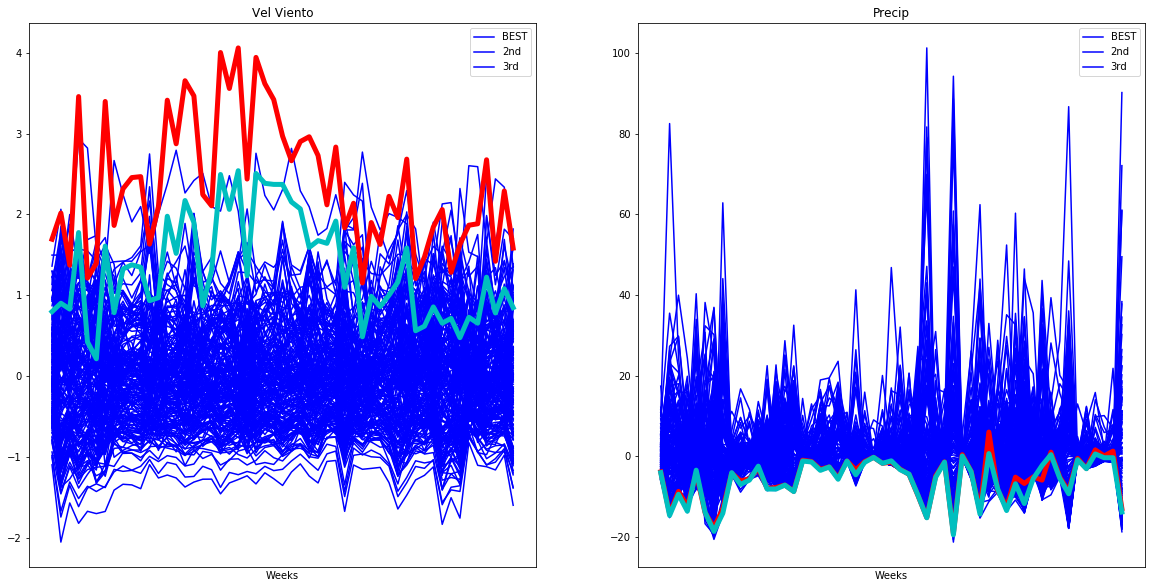

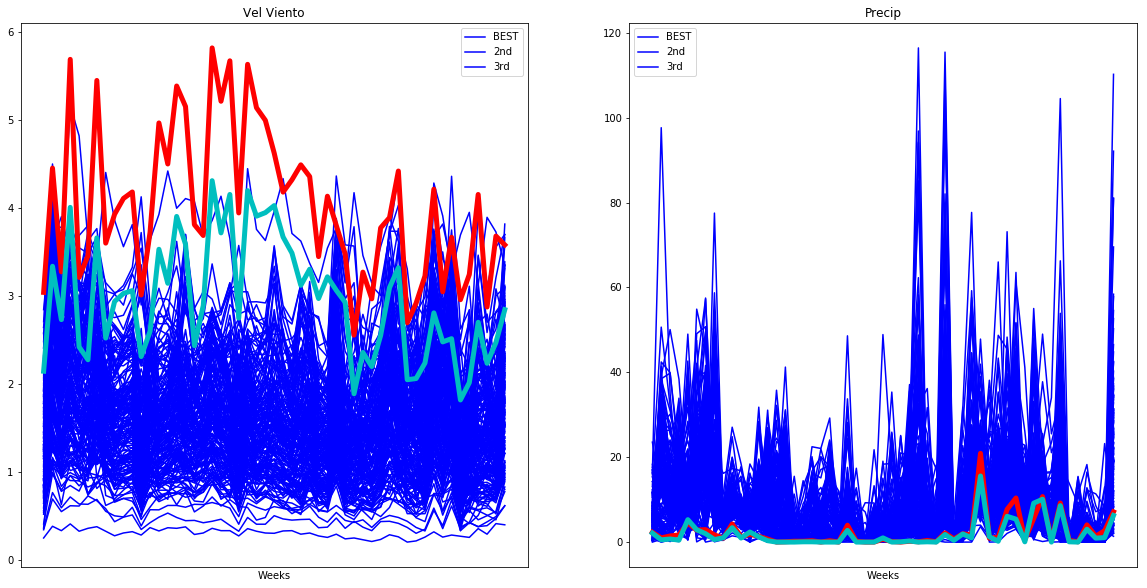

In [17]:
naming = 'TinajoLas Palmas'
naming1 = 'HariaLas Palmas'

fig, axes = plt.subplots(1,2, figsize=(20,10))


count = 0
for word in ['Vel Viento', 'Precip']:
    total = (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1)
    axes[count].plot(total.transpose(), 'b')
    axes[count].plot(total.loc[naming], 'r',linewidth=5)
    axes[count].plot(total.loc[naming1], 'c',linewidth=5)
    #axes[count].plot(total.loc[naming6], 'g',linewidth=5)
    
    axes[count].set_title(word)
    axes[count].set_xlabel('Weeks')
    axes[count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
    axes[count].legend(['BEST', '2nd', '3rd'])
    
    count+=1
    

fig, axes = plt.subplots(1,2, figsize=(20,10))
count=0
for word in ['Vel Viento', 'Precip']:
    total = (final_filter[[i for i in final_filter if word in i]]).dropna(axis=1)
    axes[count].plot(total.transpose(), 'b')
    axes[count].plot(total.loc[naming], 'r',linewidth=5)
    axes[count].plot(total.loc[naming1], 'c',linewidth=5)
    
    axes[count].set_title(word)
    axes[count].set_xlabel('Weeks')
    axes[count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
    axes[count].legend(['BEST', '2nd', '3rd'])
    
    count+=1


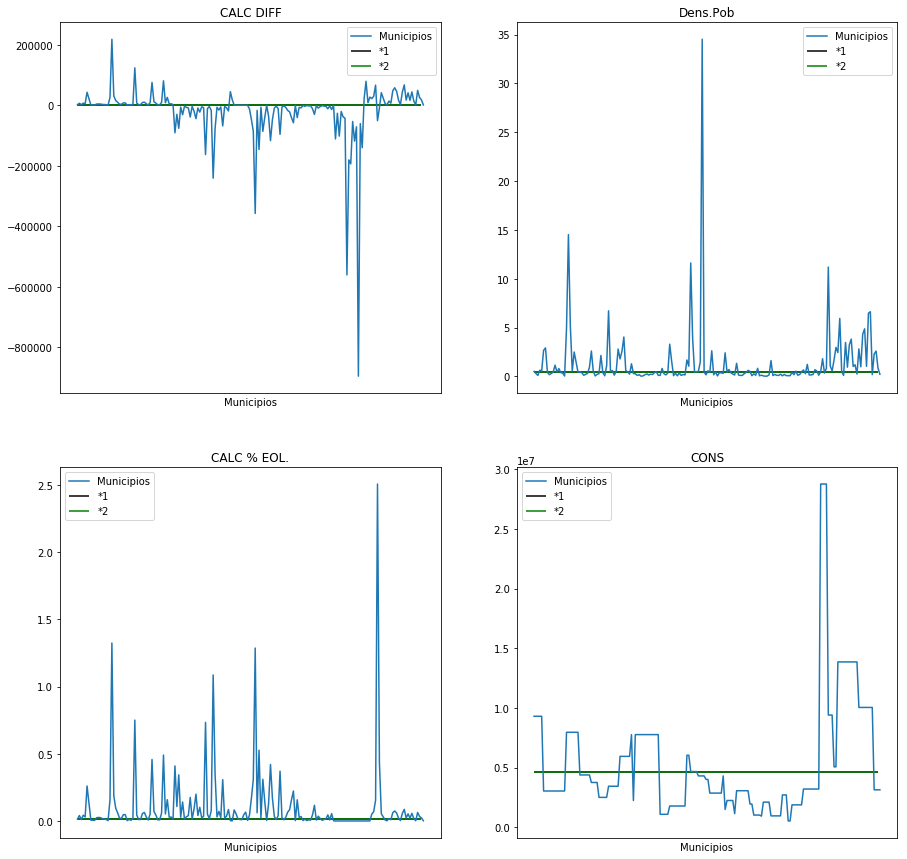

In [18]:
fi, axes = plt.subplots(2,2, figsize=(15,15))

choice1 = 'TinajoLas Palmas'
choice2 = 'HariaLas Palmas'

count = 0
for title in ['CALC DIFF', 'Dens.Pob', 'CALC % EOL.', 'CONS']:
    if count<2:
        axes[0,count].plot(final_filter[[i for i in final_filter if title in i]])
        axes[0,count].hlines(final_filter.loc[choice1][title], 0,180, 'k')
        axes[0,count].hlines(final_filter.loc[choice2][title], 0,180, 'g')
        #axes[0,count].hlines(final_filter.loc[choice3][title], 0,100, 'r')
        axes[0,count].set_title(title)
        axes[0,count].set_xlabel('Municipios')
        axes[0,count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
        axes[0,count].legend(['Municipios', '*1', '*2'])
    else:
        axes[1,count-2].plot(final_filter[[i for i in final_filter if title in i]])
        axes[1,count-2].hlines(final_filter.loc[choice1][title], 0,180, 'k')
        axes[1,count-2].hlines(final_filter.loc[choice2][title], 0,180, 'g')
       # axes[1,count-2].hlines(final_filter.loc[choice3][title], 0,100, 'r')
        axes[1,count-2].set_title(title)
        axes[1,count-2].set_xlabel('Municipios')
        axes[1,count-2].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
        axes[1,count-2].legend(['Municipios', '*1', '*2'])
    
    count+=1
    
plt.show()

### PROBLEMATICO = CONSUMO DE TINAJO LAS PALMAS

# CHOSEN: Tinajo, Las Palmas - LA TURBINA DE ESPAÑA

## Finding Index

In [19]:
print(np.where(final_filter.index =='TinajoLas Palmas'))
final_filter.iloc[84]

(array([84], dtype=int64),)


01- Precipitación (mm)    2.290000e+00
010 Precipitación (mm)    9.866667e-01
011 Precipitación (mm)    1.443333e+00
012 Precipitación (mm)    1.676667e+00
013 Precipitación (mm)    4.533333e+00
                              ...     
CALC Consumo              2.612146e+04
CALC % EOL.               1.355158e-02
CALC DIFF                 0.000000e+00
Dens.Pob                  4.624426e-01
CONS                      4.661035e+06
Name: TinajoLas Palmas, Length: 113, dtype: float64

# SCORE GENERATION
- Carried out in two phases:
- (1) Creating a distance variable for weather data; all instances of weather as a "distance" from the chosen best conditions
- (2) Normalizing all other chosen variables and creating the "score equation"

## PHASE 1

### Calculating Weather Similarity

Text(0.5, 1.0, 'Distance Histogram')

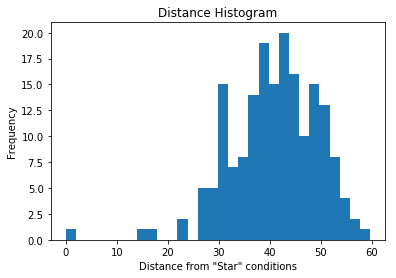

In [20]:
nn = NearestNeighbors(n_neighbors = len(final_filter.dropna(axis=1)))
ss = StandardScaler()

a = final_filter[[i for i in final_filter.columns if 'Vel Viento' in i]]
b = final_filter[[i for i in final_filter.columns if 'Precip' in i]]


#inp = ss.fit_transform(final_filter[[i for i in final_filter.columns if 'Vel Viento' in i or 'Precip' in i]].dropna(axis=1).reset_index(drop=True))
inp = ss.fit_transform(pd.concat([a,a,b], axis=1))
nn.fit(inp)
dist_eol = pd.DataFrame(nn.kneighbors(inp[84].reshape(1,-1))[0][0], columns= ['d_Weather'], index = nn.kneighbors(inp[84].reshape(1,-1))[1][0])

plt.hist(dist_eol.values, bins=30)
plt.xlabel('Distance from "Star" conditions')
plt.ylabel('Frequency')
plt.title('Distance Histogram')

## PHASE 2

### Variable Creation
- Ensuring that all variable has a distribution that is more or less normal/gaussian, so that it doesn't have a greater effect on the scores

In [21]:
inp = final_filter.drop([i for i in final_filter.columns if 'Precipitación' in i or 'Vel Viento' in i], axis=1)[['CONS', 'CALC % EOL.', 'CALC DIFF', 'Dens.Pob']]
inp['logCONS'] = np.log(inp['CONS'])
inp['logDens.Pob'] = np.log(inp[['Dens.Pob']])
inp['SQRT % EOL.'] = np.sqrt(inp['CALC % EOL.'])
inp['CALC DIFF NEW'] = np.sqrt(218288 - inp['CALC DIFF'])

inp = inp.drop(['CONS', 'CALC % EOL.', 'Dens.Pob', 'CALC DIFF'], axis=1)

## Compiling all variables into "total"

In [22]:
ss = StandardScaler()
mms = MinMaxScaler()

total = pd.concat([inp.reset_index(drop=True), dist_eol],axis=1)
print(total)

total = ss.fit_transform(total)

       logCONS  logDens.Pob  SQRT % EOL.  CALC DIFF NEW  d_Weather
0    16.045167    -0.672401     0.116003     464.833307  33.002797
1    16.045167    -1.215712     0.201170     460.019214  35.474372
2    16.045167    -2.282813     0.102806     465.344998  32.498262
3    16.045167    -0.454373     0.207386     459.564003  44.659102
4    16.045167    -0.573439     0.171673     461.985242  46.076735
..         ...          ...          ...            ...        ...
177  16.121885    -1.724301     0.041967     465.741001  53.715853
178  14.957224     0.831812     0.251353     411.126341  42.822989
179  14.957224     0.952789     0.182485     438.545047  51.320542
180  14.957224    -0.167966     0.151054     447.768108  48.456623
181  14.957224    -1.506266     0.034525     466.217312  44.472946

[182 rows x 5 columns]


## Calculating and normalizing score values

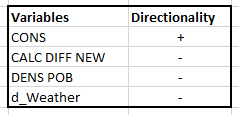

- CHOSEN EQUATION:
###    SCORE = CONS - log(DENS POB) - CALC_DIFF_NEW - 2*d_Weather

Index(['logCONS', 'logDens.Pob', 'SQRT % EOL.', 'CALC DIFF NEW'], dtype='object')


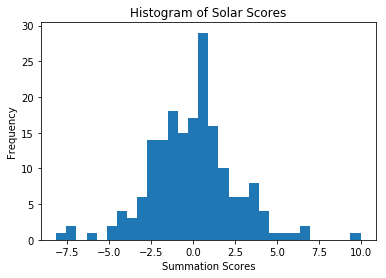

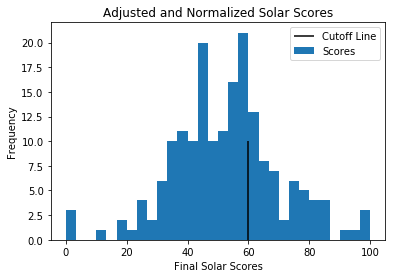

In [23]:
print(inp.columns)

new_score = total[:,0] - total[:,1] - total[:,3] - 2 *total[:,4]

plt.hist(new_score, bins=30)
plt.title('Histogram of Solar Scores')
plt.xlabel('Summation Scores')
plt.ylabel('Frequency')

min_loc = np.argmin(new_score)
max_loc = np.argmax(new_score)

ordering = np.where(np.logical_and(new_score!=np.min(new_score), new_score!=np.max(new_score)))

checkz = new_score[ordering]

max_loc2 = ordering[0][np.argmax(checkz)]

ordering1 = np.where(checkz!=np.max(checkz))

new_score = mms.fit_transform(checkz[ordering1].reshape(-1,1))*100
new_score = pd.DataFrame(new_score, index = list(ordering[0][ordering1[0]]), columns = ['SCORES_NEW'])
new_score.loc[max_loc] = 100
new_score.loc[max_loc2] = 100
new_score.loc[min_loc] = 0

plt.figure()
plt.hist(new_score.values, bins=30)
plt.title('Adjusted and Normalized Solar Scores')
plt.xlabel('Final Solar Scores')
plt.ylabel('Frequency')
plt.vlines(60, 0, 10)
plt.legend(['Cutoff Line', 'Scores'])

test_again = pd.concat([final_filter.reset_index(), new_score],axis=1)
test_again_wind = test_again

### PRE-NORMALIZATION SCORES BY SUMMATION

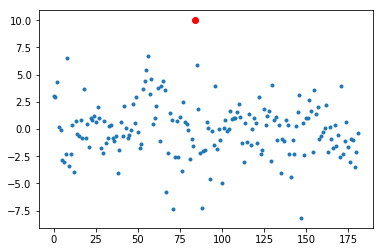

In [24]:
num = 84
plt.plot(total[:,0] - total[:,1] - total[:,3] - 2 *total[:,4],'.')
plt.plot(num, total[num,0] - total[num,1] - total[num,3] - 2 *total[num,4], 'ro')

# VISUALIZE SCORES

In [25]:
from ipywidgets import interact
@interact (n=(0,len(test_again.sort_values(by='SCORES_NEW', ascending=False)['UNIQUE'])))

def viewGraph(n=0):
   
    print(n)
    print(test_again.sort_values(by='SCORES_NEW', ascending=False)['SCORES_NEW'].iloc[n])

    naming = 'TinajoLas Palmas'
    naming1 = test_again.sort_values(by='SCORES_NEW', ascending=False)['UNIQUE'].iloc[n]
    print(naming1)

    fig, axes = plt.subplots(1,2, figsize=(20,10))


    count = 0
    for word in ['Vel Viento', 'Precip']:
        total = (final_filter[[i for i in final_filter if word in i]] - final_filter[[i for i in final_filter if word in i]].mean(axis=0)).dropna(axis=1)
        axes[count].plot(total.transpose(), 'b')
        axes[count].plot(total.loc[naming], 'r',linewidth=5)
        axes[count].plot(total.loc[naming1], 'g',linewidth=5)
        axes[count].set_title(word)
        axes[count].legend(['BEST', '2nd', '3rd'])

        count+=1
        
    
    fi, axes = plt.subplots(2,2, figsize=(15,15))
    
    choice1 = naming
    choice2 = naming1

    count = 0
    for title in ['CALC DIFF', 'Dens.Pob', 'CALC % EOL.', 'CONS']:
        #ax = final_filter[[i for i in final_filter if title in i]].plot(legend=False)
        if count<2:
            axes[0,count].plot(final_filter[[i for i in final_filter if title in i]])
            axes[0,count].hlines(final_filter.loc[choice1][title], 0,180, 'k')
            axes[0,count].hlines(final_filter.loc[choice2][title], 0,180, 'g')
            axes[0,count].set_title(title)
            axes[0,count].set_xlabel('Municipios')
            axes[0,count].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
            axes[0,count].legend(['Municipios', '*1', '*2'])
        else:
            axes[1,count-2].plot(final_filter[[i for i in final_filter if title in i]])
            axes[1,count-2].hlines(final_filter.loc[choice1][title], 0,180, 'k')
            axes[1,count-2].hlines(final_filter.loc[choice2][title], 0,180, 'g')
            axes[1,count-2].set_title(title)
            axes[1,count-2].set_xlabel('Municipios')
            axes[1,count-2].tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)
            axes[1,count-2].legend(['Municipios', '*1', '*2'])

        count+=1


interactive(children=(IntSlider(value=0, description='n', max=182), Output()), _dom_classes=('widget-interact'…

In [26]:
test_again_wind.to_excel('final_data_wind_v2.xls')

In [30]:
test_again

,UNIQUE,01- Precipitación (mm),010 Precipitación (mm),011 Precipitación (mm),012 Precipitación (mm),013 Precipitación (mm),014 Precipitación (mm),015 Precipitación (mm),016 Precipitación (mm),017 Precipitación (mm),...,08- Vel Viento (m/s),09- Vel Viento (m/s),LONGITUD_ETRS89,LATITUD_ETRS89,CALC Consumo,CALC % EOL.,CALC DIFF,Dens.Pob,CONS,SCORES_NEW
0,Isla MayorSevilla,7.466667,18.666667,13.333333,15.233333,1.666667,17.500000,22.700,2.933333,7.245000,...,2.016667,3.816667,-6.162849,37.133844,27946.660583,0.013457,2217.996363,0.510481,9.296675e+06,74.807532
1,OsunaSevilla,13.666667,21.733333,17.800000,10.266667,4.733333,21.300000,20.200,8.133333,8.115000,...,2.176667,2.833333,-5.101206,37.237571,84045.788634,0.040469,6670.323023,0.296499,9.296675e+06,73.906772
2,AznalcazarSevilla,8.666667,20.400000,13.400000,24.133333,3.333333,13.200000,30.100,4.666667,6.885000,...,1.796667,2.936667,-6.252362,37.304734,21949.543660,0.010569,1742.033108,0.101997,9.296675e+06,84.067625
3,Lora del RioSevilla,8.466667,22.900000,23.733333,19.966667,0.533333,17.800000,28.400,2.933333,6.825000,...,1.093333,2.066667,-5.530359,37.653334,89320.188353,0.043009,7088.927577,0.634846,9.296675e+06,54.419014
4,GuillenaSevilla,5.600000,27.600000,16.333333,19.400000,1.666667,18.700000,27.000,15.933333,5.665000,...,0.823333,2.123333,-6.052323,37.539397,61206.010538,0.029472,4857.636151,0.563584,9.296675e+06,52.431663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,PlanesAlicante,2.003333,1.333333,0.600000,19.450000,34.676667,20.243333,1.805,77.513333,3.741750,...,0.743333,1.126667,-0.344785,38.785834,3742.602957,0.001761,1373.319530,0.178298,1.003797e+07,45.911890
178,OndaCastellon,5.423333,1.246667,0.130000,18.423333,18.503333,42.100000,5.020,12.303333,1.708000,...,1.293333,1.643333,-0.263164,39.964207,134253.054690,0.063178,49263.131599,2.297479,3.132132e+06,45.263379
179,NulesCastellon,4.886667,1.543333,1.210000,15.653333,25.453333,47.506667,4.425,13.040000,2.646250,...,0.796667,0.976667,-0.154732,39.853121,70763.818963,0.033301,25966.242139,2.592932,3.132132e+06,27.824446
180,SegorbeCastellon,3.730000,2.886667,0.720000,22.920000,15.306667,31.036667,5.980,28.740000,3.409750,...,0.943333,1.016667,-0.488080,39.852366,48486.420411,0.022817,17791.721127,0.845383,3.132132e+06,37.731239


In [27]:
testing_plz = test_again_wind
save_index_good = testing_plz[testing_plz['SCORES_NEW']>=60].index.values
save_index_bad = testing_plz[testing_plz['SCORES_NEW']<60].index.values
good = pd.DataFrame(np.ones(len(save_index_good)), index= list(save_index_good), columns = ['Y_N'])
bad = pd.DataFrame(np.zeros(len(save_index_bad)), index= list(save_index_bad), columns = ['Y_N'])
test_again_wind=pd.concat([test_again_wind, pd.concat([good,bad], axis=0)], axis=1)


In [28]:
import plotly.express as px
@interact(color = ['SCORES_NEW', 'Y_N'])
def view_map(color='SCORES_NEW'):
    view = px.scatter(test_again_wind, x='LONGITUD_ETRS89', y='LATITUD_ETRS89', color = color, hover_data = ['UNIQUE'])
    view.show()

interactive(children=(Dropdown(description='color', options=('SCORES_NEW', 'Y_N'), value='SCORES_NEW'), Output…